In [1]:
import pypsa
import pandas as pd
import numpy as np

In [6]:
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
plt.rcParams['figure.dpi']= 400
plt.style.use('bmh')
%matplotlib inline

In [24]:
plt.rcParams['figure.figsize']=(15, 8)

In [16]:
period_start = "2018-06-01"
period_end = "2018-09-30"
time_start = '{} 00:00:00'.format(period_start)
time_end = '{} 23:00:00'.format(period_end)
timespan = pd.date_range(start=time_start, end=time_end, freq='H')

In [2]:
path_n = 'D:\Python\PyPSA\Luca/nodal_zonal_model\hydro\hpc_results\last_results/4months/networks/network_merged_nodal_05_h1.nc'
n = pypsa.Network(path_n)

INFO:pypsa.io:Imported network network_merged_nodal_05_h1.nc has buses, carriers, generators, lines, links, loads, storage_units


In [40]:
cost_tech = (n.generators_t.p.loc[timespan].multiply(n.generators.marginal_cost)).groupby(n.generators.carrier,axis=1).sum()

In [45]:
conv = ['CCGT', 'OCGT', 'coal','lignite','nuclear','oil']#,'load_shed']

In [ ]:
plt.plot(cost_tech)
plt.legend(cost_tech.columns)
plt.show()

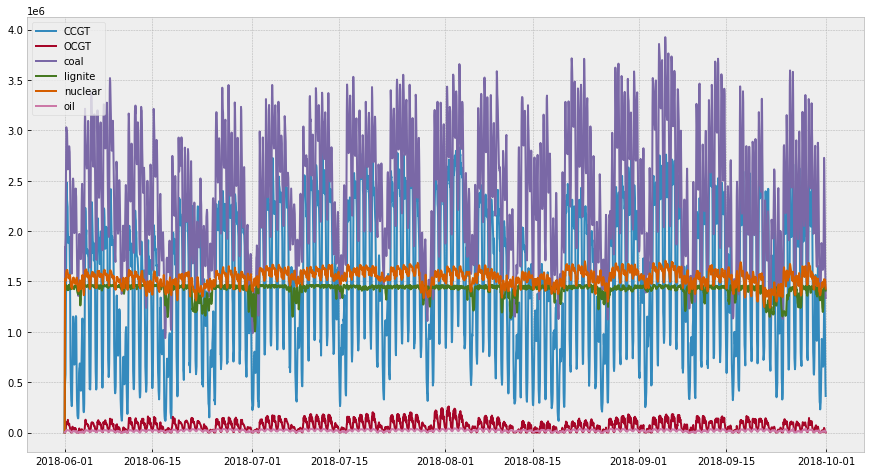

In [46]:
plt.plot(cost_tech[conv])
plt.legend(conv)
plt.show()

In [30]:
n.generators.carrier.unique()

array(['onwind', 'ror', 'solar', 'CCGT', 'OCGT', 'coal', 'nuclear',
       'biomass', 'offwind-ac', 'offwind-dc', 'lignite', 'oil',
       'geothermal', ''], dtype=object)

In [42]:
cost_tech

carrier,CCGT,OCGT,biomass,coal,geothermal,lignite,load_shed,nuclear,offwind-ac,offwind-dc,oil,onwind,ror,solar
2018-06-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2018-06-01 01:00:00,4.775311e+05,6610.432320,90688.131780,1.842631e+06,0.0,1.424949e+06,0.000000,1.493721e+06,4097.636439,2558.832755,6576.292244,20624.810637,78972.875400,0.0
2018-06-01 02:00:00,5.281482e+05,7524.677209,90914.697517,1.833130e+06,0.0,1.433404e+06,0.000000,1.502400e+06,4078.967027,2361.801429,5987.412893,19173.210432,78965.295924,0.0
2018-06-01 03:00:00,5.799096e+05,9656.188917,111701.173331,1.932169e+06,0.0,1.440487e+06,0.000000,1.531667e+06,3968.563926,2263.958281,6877.680689,17467.610722,79969.837962,0.0
2018-06-01 04:00:00,9.696662e+05,34189.570777,117069.136752,2.335852e+06,0.0,1.439765e+06,0.000000,1.508589e+06,3802.976275,2275.667647,10963.590279,15323.926523,80735.951946,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,1.307402e+06,23992.646251,130898.623932,2.367749e+06,0.0,1.426307e+06,73139.291982,1.495836e+06,16360.518137,19145.415889,20015.631103,39645.198748,29717.791901,0.0
2018-09-30 20:00:00,1.081772e+06,13398.314296,131010.569840,2.049833e+06,0.0,1.426545e+06,0.000000,1.500878e+06,17317.515008,20523.447722,17107.255245,39668.915350,29776.270089,0.0
2018-09-30 21:00:00,7.311837e+05,6206.508799,124548.879954,1.655125e+06,0.0,1.429581e+06,0.000000,1.512085e+06,18183.333892,20349.205790,13015.370246,39099.627836,29698.483095,0.0
2018-09-30 22:00:00,4.997145e+05,986.401000,117656.257499,1.466377e+06,0.0,1.423890e+06,0.000000,1.465975e+06,18579.757433,19858.379345,9586.240555,38482.163412,29894.637732,0.0


In [38]:
for gen in n.generators.index:
    if not n.generators.carrier[gen]:
        n.generators.carrier[gen] = 'load_shed'

C:\Users\Luca01\AppData\Local\Temp/ipykernel_13708/116111711.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
n.generators


,p_nom_max,weight,p_nom,capital_cost,p_nom_min,marginal_cost,carrier,efficiency,bus,control,...,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
name,,,,,,,,,,,,,,,,,,,,,
AT0 0 onwind,3618.739311,32.969362,12.406769,109295.569252,0.0,1.50,onwind,1.00,AT0 0,Slack,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
AT0 0 ror,inf,193.084663,193.084663,270940.715283,0.0,3.00,ror,0.90,AT0 0,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
AT0 0 solar,1639.992892,221.441481,32.485599,55064.071419,0.0,0.00,solar,1.00,AT0 0,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
AT0 1 CCGT,inf,0.000000,389.000000,0.000000,0.0,53.79,CCGT,0.50,AT0 1,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
AT0 1 OCGT,inf,0.000000,153.000000,0.000000,0.0,65.98,OCGT,0.39,AT0 1,,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SK0 4 load_shed,inf,NaN,10000.000000,0.000000,0.0,10000.00,load_shed,1.00,SK0 4,PQ,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
SK0 5 load_shed,inf,NaN,10000.000000,0.000000,0.0,10000.00,load_shed,1.00,SK0 5,PQ,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
SK0 6 load_shed,inf,NaN,10000.000000,0.000000,0.0,10000.00,load_shed,1.00,SK0 6,PQ,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
